In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


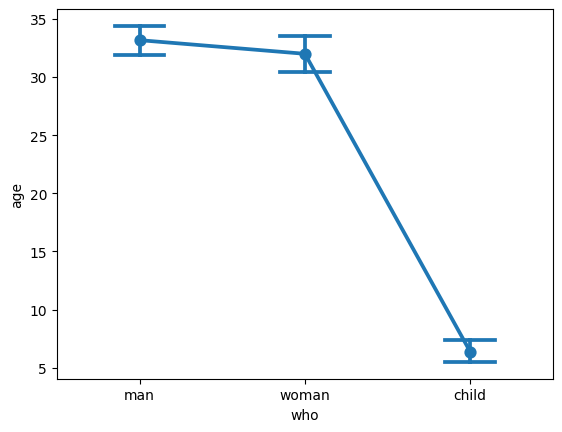

In [5]:
# point plot x=who, y=mean of age
sns.pointplot(data=titanic, x='who', y='age', capsize=0.3); #capsize để điều chỉnh độ rộng của khoảng tin cậy của các điểm được vẽ

In [6]:
titanic.groupby('who')['age'].mean() #Tính trung bình tuổi theo từng nhóm giới tính trên titanic

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [8]:
df = pd.read_csv('vd_seaborn/museum_visitors.csv', index_col=0, parse_dates=True)

In [9]:
df.shape

(59, 4)

In [10]:
df.head() #Lượng du khách ghé thăm 4 viện bảo tàng qua từng ngày

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


In [14]:
df.mean(axis=0) #Tính trung bình tổng lượng du khách ghé thăm của 4 viện bảo tàng
                #axis = 0 để  tính mean theo từng hàng, tức tính tổng tất cả các hàng tong một cột rồi lấy trung bình cộng

Avila Adobe                             24061.661017
Firehouse Museum                         6472.830508
Chinese American Museum                  2721.254237
America Tropical Interpretive Center     7107.016949
dtype: float64

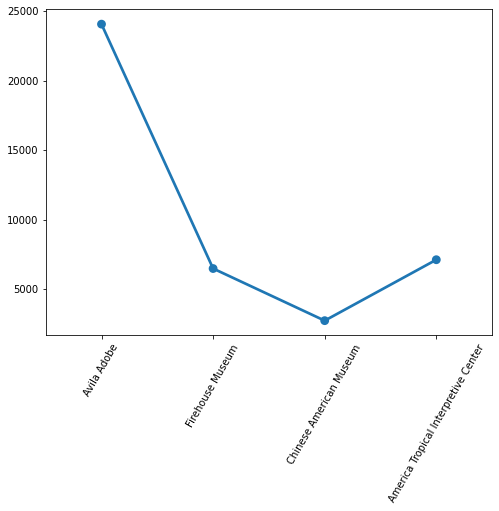

In [21]:
# ve point plot cho tong so luong du khach cua 4 vien bao tang trong tat ca cac nam
plt.figure(figsize=(8,6))
sns.pointplot(x=df.columns, y=df.mean(axis=0))
plt.xticks(rotation=60)
plt.show()

In [15]:
#Tạo df mới để vẽ cho tiện hơn

df_ = df.mean(axis=0).to_frame().reset_index() #Tạo df mới chứa trung bình cộng tổng lượng khách
df_.rename(columns={'index':'name', 0:'mean'}, inplace=True) #Chỉ định cột name làm cột index, và cột đầu tiên (0) tên là mean)

In [16]:
df_

,name,mean
0,Avila Adobe,24061.661017
1,Firehouse Museum,6472.830508
2,Chinese American Museum,2721.254237
3,America Tropical Interpretive Center,7107.016949


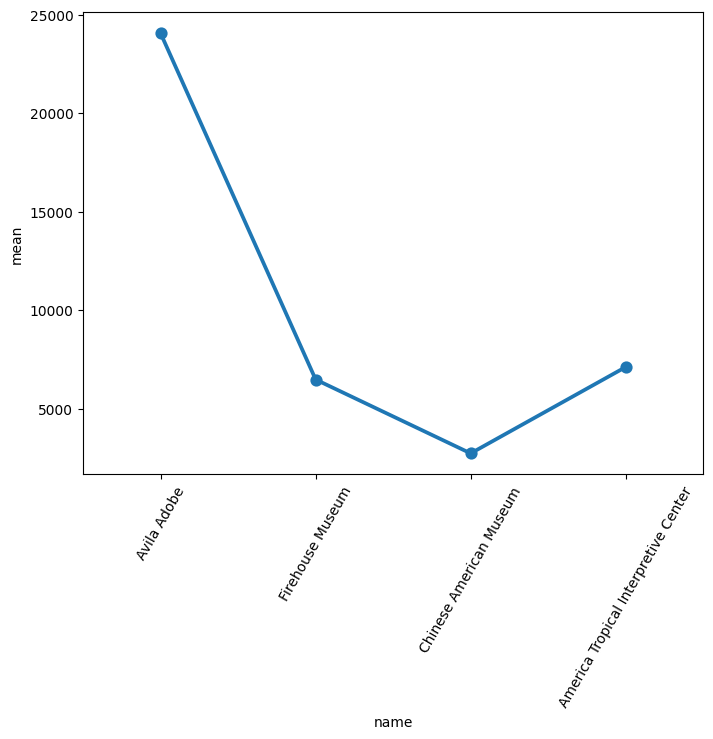

In [18]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_, x='name', y='mean') #Vì đã gom dữ liệu lại về mean, chỉ có một số duy nhất nên không vẽ được khoảng tin cậy
plt.xticks(rotation=60)
plt.show()

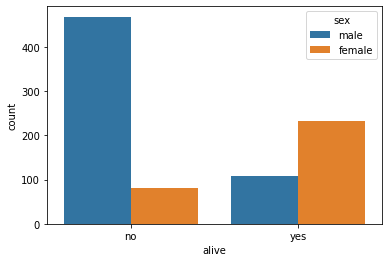

In [31]:
# thong ke so hanh khach nam va nu trong 2 nhom song/chet
sns.countplot(data=titanic, x='alive', hue='sex'); #countplot là hàm chuyên dùng để đêm

#Nhận thấy lượng chết nam nhiều hơn nữ, người nữ được cứu sống nhiều hơn

In [19]:
titanic.age.isnull().sum()

177

In [20]:
# xu ly chia tuoi lam 3 nhom
# nhom thieu nien: tuoi <= 17
# nhom nguoi lon: 17<tuoi<50
# nhom nguoi gia: tuoi>=50
titanic['phan_loai_tuoi'] = np.where(titanic['age']<=17,'thieu nien',np.where(titanic['age']<50,'nguoi lon','nguoi gia'))

In [21]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,phan_loai_tuoi
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,nguoi lon
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,nguoi lon
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,nguoi lon
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,nguoi lon
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,nguoi lon
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,nguoi gia
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,nguoi gia
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,thieu nien
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,nguoi lon
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,thieu nien


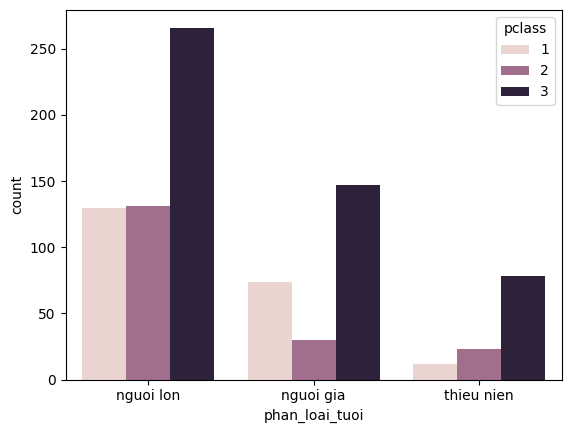

In [22]:
sns.countplot(data=titanic, x='phan_loai_tuoi', hue='pclass');